## Importing libraries

In [5]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Activation
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Importing DataSet

> TensorFlow allows us to read the MNIST dataset and we can load it directly in the program as a train and test dataset.

In [4]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [13]:
type(x_train)

numpy.ndarray

## Convert the Pixels into Floating Values

In [14]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [17]:
# normalize image pixel values by dividing by 255 
gray_scale = 255
x_train /= gray_scale  # x_train = x_train/255
x_test /= gray_scale

> Changing the numbers into **`grayscale`** values will be beneficial as the values become small and the computation becomes easier and faster. As the pixel values range from **`0 to 256`**, apart from 0 the range is 255. So dividing all the values by 255 will convert it to range from 0 to 1.

## Structure of DataSet

In [19]:
print("Feature matrix:", x_train.shape) 
print("Target matrix:", x_test.shape) 
print('=='*20)
print("Feature matrix:", y_train.shape) 
print("Target matrix:", y_test.shape) 

Feature matrix: (60000, 28, 28)
Target matrix: (10000, 28, 28)
Feature matrix: (60000,)
Target matrix: (10000,)


> Thus we get that we have **60,000** records in the training dataset and **10,000** records in the test dataset and Every image in the dataset is of the size **28×28**.

## Data Visulaization

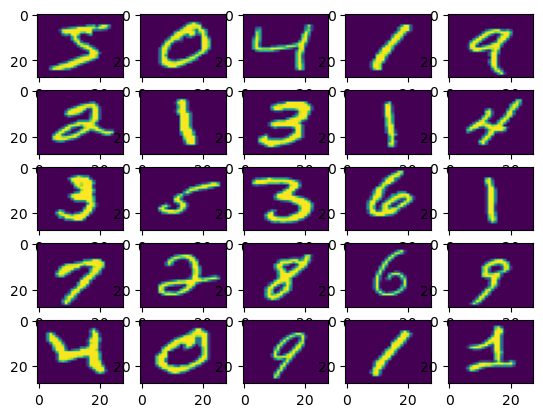

In [22]:
fig, img = plt.subplots(5, 5) 
k = 0
for i in range(5): 
    for j in range(5): 
        img[i][j].imshow(x_train[k].reshape(28, 28),  
                        aspect='auto') 
        k += 1
plt.show(); 

In [25]:
model = Sequential([ 
    
    # reshape 28 row * 28 column data to 28*28 rows 
    Flatten(input_shape=(28, 28)), 
    
      # dense layer 1 
    Dense(256, activation='sigmoid'),   
    
    # dense layer 2 
    Dense(128, activation='sigmoid'),  
    
      # output layer 
    Dense(10, activation='sigmoid'),   
]) 

- The **Sequential model** allows us to create models layer-by-layer as we need in a multi-layer perceptron and is limited to single-input, single-output stacks of layers.
- **Flatten** flattens the input provided without affecting the batch size. For example, If inputs are shaped (batch_size,) without a feature axis, then flattening adds an extra channel dimension and output shape is (batch_size, 1).
- **Activation** is for using the sigmoid activation function.
- The **first two Dense layers** are used to make a fully connected model and are the hidden layers.
- The **last Dense layer** is the output layer which contains 10 neurons that decide which category the image belongs to.

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


## Compile the model.

In [27]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

In [30]:
history = model.fit(x_train, y_train, epochs=10,batch_size=2000,validation_split=0.2) 

Epoch 1/10
24/24 [==============================] - 1s 25ms/step - loss: 0.2764 - accuracy: 0.9222 - val_loss: 0.2575 - val_accuracy: 0.9293
Epoch 2/10
24/24 [==============================] - 1s 25ms/step - loss: 0.2622 - accuracy: 0.9265 - val_loss: 0.2462 - val_accuracy: 0.9316
Epoch 3/10
24/24 [==============================] - 1s 21ms/step - loss: 0.2489 - accuracy: 0.9292 - val_loss: 0.2355 - val_accuracy: 0.9342
Epoch 4/10
24/24 [==============================] - 1s 23ms/step - loss: 0.2375 - accuracy: 0.9324 - val_loss: 0.2261 - val_accuracy: 0.9370
Epoch 5/10
24/24 [==============================] - 1s 23ms/step - loss: 0.2271 - accuracy: 0.9352 - val_loss: 0.2176 - val_accuracy: 0.9391
Epoch 6/10
24/24 [==============================] - 1s 23ms/step - loss: 0.2171 - accuracy: 0.9377 - val_loss: 0.2106 - val_accuracy: 0.9417
Epoch 7/10
24/24 [==============================] - 1s 22ms/step - loss: 0.2085 - accuracy: 0.9404 - val_loss: 0.2040 - val_accuracy: 0.9422
Epoch 8/10
24

## Checking Accuracy

In [31]:
results = model.evaluate(x_test,  y_test, verbose = 2) 
print('test loss, test acc:', results)

313/313 - 0s - loss: 0.1879 - accuracy: 0.9447 - 439ms/epoch - 1ms/step
test loss, test acc: [0.18794408440589905, 0.9447000026702881]


In [33]:
# for HD visualizations
%config InlineBackend.figure_format='retina'

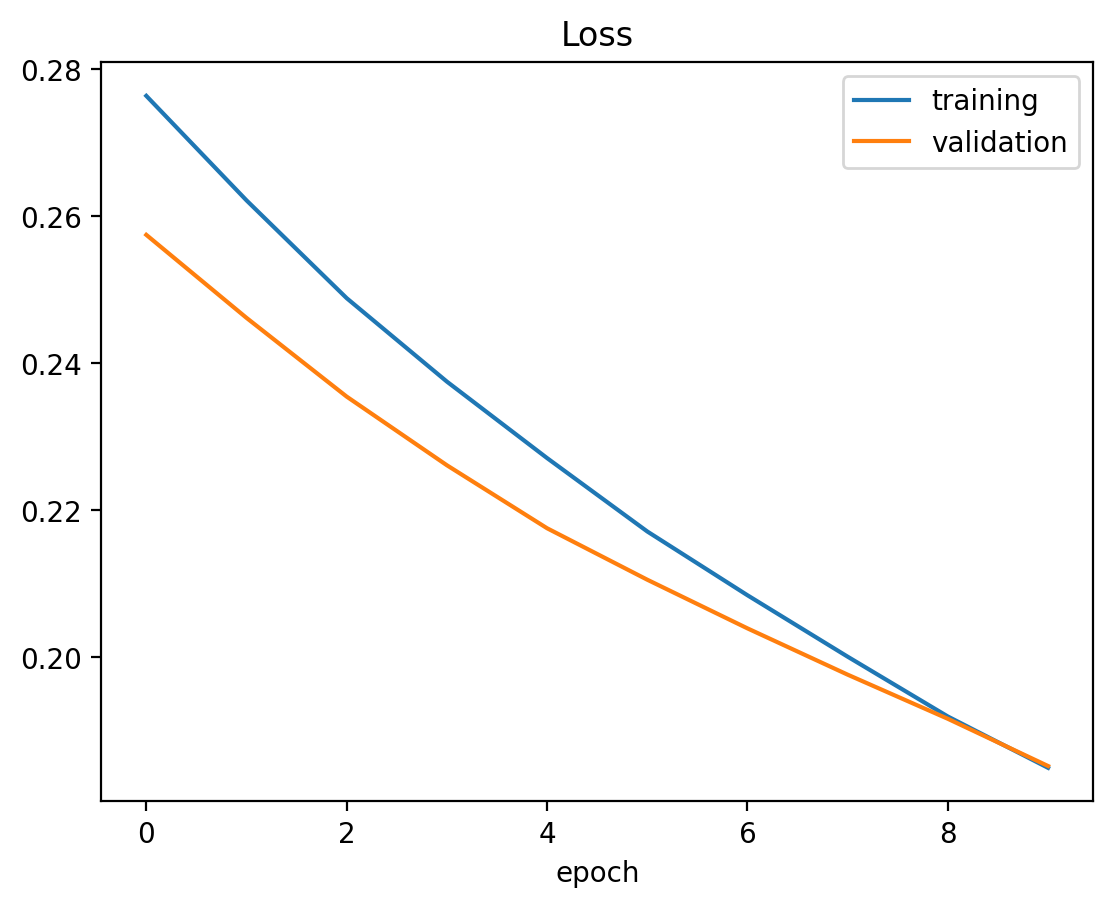

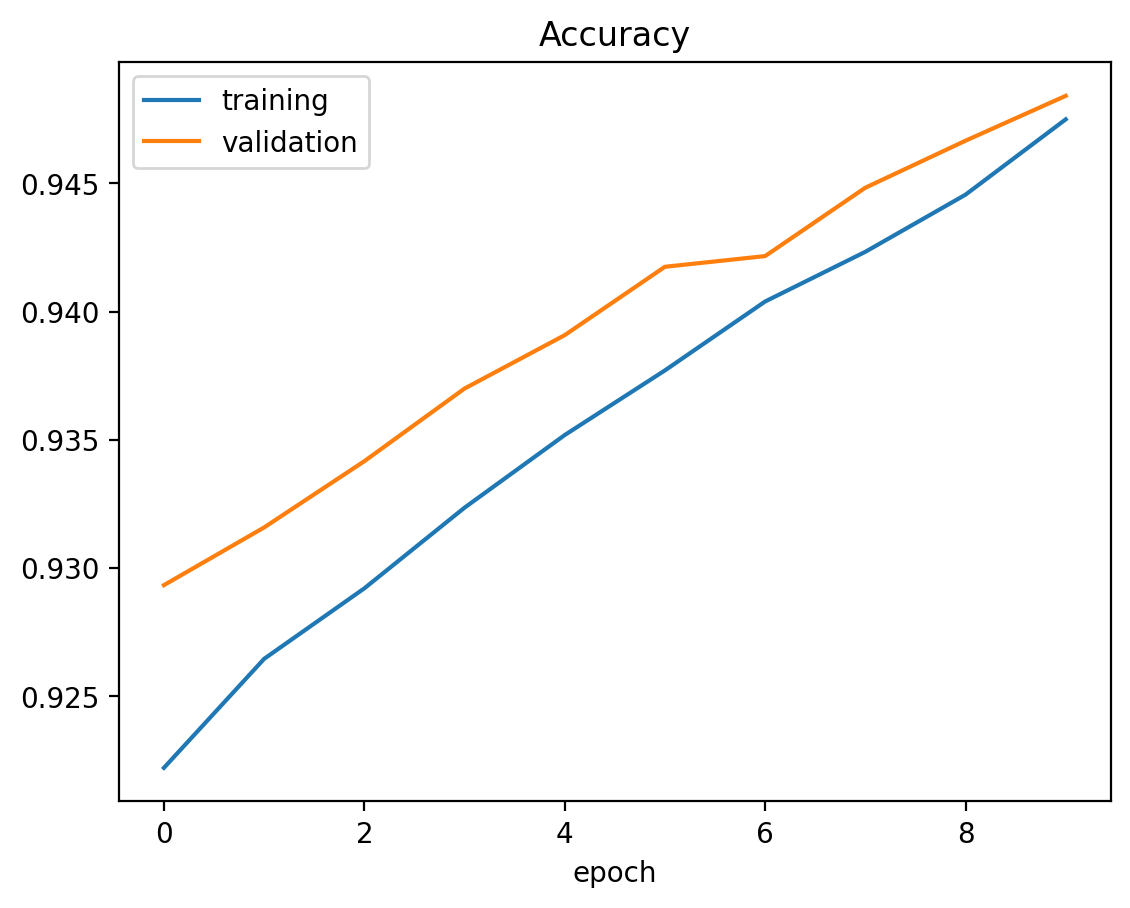

In [43]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')

plt.figure(2)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show();